# WW3 model animation

**Purpose:** To create series of animations for the NOAA WW3 model over time.

**Creator:** Leo Peach

**Created:** 10/02/2019

In [4]:
#an issue with basemap
#import os
#os.environ['PROJ_LIB'] = '/home/leo/anaconda3/envs/mlenv/share/proj'

In [93]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
import datetime
import os
import io
from PIL import Image
import collections
import requests
import fetch_multigrid
import xarray as xr
import collections

In [104]:
locs = collections.OrderedDict()
#ordered dict of leftsidelon, rightsidelon, upperlat, lowerlat
locs['AU'] = [105, 160, -8, -46]
locs['QLD'] = [130,160,-8,-26]
locs['NSW'] = [145,158,-26,-38]
locs['WA'] = [113,129,-12,-36]
locs['TAS'] = [135,151,-36,-49]
locs['SA'] = [115,142,-30,-39]
locs['NT'] = [127,142,-9.5,-18]

In [105]:
def aus_anim_hm0(ds,loc):
    """takes in an NOAA xarray object and creates an animation for Australia of Hs (HM0)"""
    
    
    # Get some parameters for the Stereographic Projection
    #Coords for centre of Australia
    lon_0 = 134 
    lat_0 = -23    

    fig, axes = plt.subplots(figsize=(10,8))
    
    maps = []
    for timestep in range(len(ds.time.data[0:10])):
        x = ds.lon.data
        y = ds.lat.data
        measurement_grid = ds.htsgwsfc.isel(time=timestep)

        fig = plt.figure(figsize=(10,8))

        ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
        ax.set_extent(loc, crs=ccrs.PlateCarree())
        colormesh  = ax.pcolormesh(ds.lon.data,ds.lat.data,ds.htsgwsfc.isel(time = timestep),cmap = 'rainbow',transform=ccrs.PlateCarree())
        colormesh.set_clim(vmin = 0, vmax = 5)
        cbar = plt.colorbar(colormesh, cmap = 'rainbow',label='Hm0 (m)',fraction=0.03, pad=0.04)
        
        #add boundaries
        import cartopy.feature as cfeature
        # Put a background image on for nice sea rendering.
        ax.stock_img()

        # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
        states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale='50m',
            facecolor='none')
        
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(states_provinces, edgecolor='gray')
        plt.title('time: '+ str(ds.time[timestep].data)[:-7]+'z')
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        maps.append(Image.open(buf))
    
    #generate gif animation
    gif = io.BytesIO()
    maps[0].save(gif, format = 'gif', save_all=True, append_images=maps[1:], duration =1000, loop=0)
    gif.seek(0)
    import base64
    data_uri = base64.b64encode(gif.read()).decode('ascii')
    return data_uri

In [109]:
def aus_anim_t02(ds,loc):
    """takes in an NOAA xarray object and creates an animation for Australia of Hs (HM0)"""
    
    
    # Get some parameters for the Stereographic Projection
    #Coords for centre of Australia
    lon_0 = 134 
    lat_0 = -23    

    fig, axes = plt.subplots(figsize=(10,8))
    
    maps = []
    for timestep in range(len(ds.time.data[0:10])):
        x = ds.lon.data
        y = ds.lat.data
        measurement_grid = ds.perpwsfc.isel(time=timestep)

        fig = plt.figure(figsize=(10,8))

        ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
        ax.set_extent(loc, crs=ccrs.PlateCarree())
        colormesh  = ax.pcolormesh(ds.lon.data,ds.lat.data,ds.perpwsfc.isel(time = timestep),cmap = 'rainbow',transform=ccrs.PlateCarree())
        colormesh.set_clim(vmin = 0, vmax = 25)
        cbar = plt.colorbar(colormesh, cmap = 'rainbow',label='T02 (seconds)',fraction=0.03, pad=0.04)
        
        #add boundaries
        import cartopy.feature as cfeature
        # Put a background image on for nice sea rendering.
        ax.stock_img()

        # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
        states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale='50m',
            facecolor='none')
        
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(states_provinces, edgecolor='gray')
        plt.title('time: '+ str(ds.time[timestep].data)[:-7]+'z')
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        maps.append(Image.open(buf))
    
    #generate gif animation
    gif = io.BytesIO()
    maps[0].save(gif, format = 'gif', save_all=True, append_images=maps[1:], duration =1000, loop=0)
    gif.seek(0)
    import base64
    data_uri = base64.b64encode(gif.read()).decode('ascii')
    return data_uri

Building file


/home/leo/anaconda3/envs/mlenv/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


complete


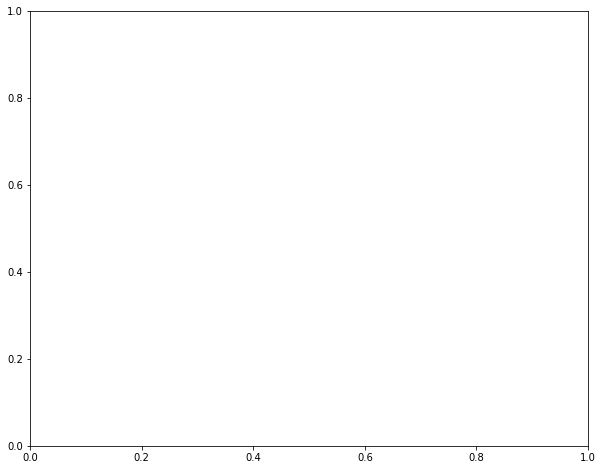

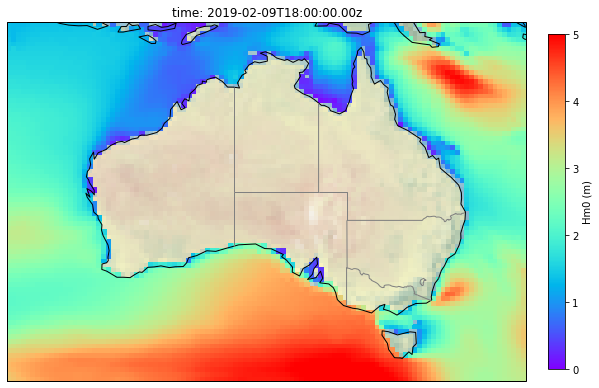

In [ ]:
def main(locs):
    
    dataset = xr.open_dataset(fetch_multigrid.build_urls()[-1])
    print('Building file')
    name = 'NOAA Forecast Wave Height Animations.html'
    html = open(name, 'w')
    html.write("<head><title>Forecast Data Loops</title></head>\n")
    html.write("<h1>Forecast Data Loops</h1>\n")
    html.write("<p>Forecasting loops from the NOAA WW3 model &copy; NOAA</p>\n")
    for k, v in locs.items():
        
        html.write("<h3>"+k+"</h3>\n")
        html.write('<img src="data:image/png;base64,{0}">'.format(aus_anim_hm0(dataset, v)))
        html.write('<img src="data:image/png;base64,{0}">'.format(aus_anim_t02(dataset, v)))
    
    html.write("<br></br>\n")
    html.write("</body>")
    html.close()
    print('complete')
    return


In [ ]:
if __name__ == '__main__':
    main(locs)